# Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for forecasting.


#Cocacola

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data_cocacola = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
data_cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
#Converting 'Quarter' column to datetime format
def convert_to_datetime(quarter_str):
    quarter, year = quarter_str.split('_')
    year = '19' + year if int(year) <= 50 else '20' + year
    if quarter == 'Q1':
        return pd.to_datetime(year + '-01-01')
    elif quarter == 'Q2':
        return pd.to_datetime(year + '-04-01')
    elif quarter == 'Q3':
        return pd.to_datetime(year + '-07-01')
    elif quarter == 'Q4':
        return pd.to_datetime(year + '-10-01')
    else:
        return None

In [4]:
#Preprocessing the data
data_cocacola['Quarter'] = data_cocacola['Quarter'].apply(convert_to_datetime)
data_cocacola.set_index('Quarter', inplace=True)

In [5]:
#Handling missing values
data_cocacola.dropna(inplace=True)

In [6]:
#spliting the data into training and testing sets
train_size = int(len(data_cocacola) * 0.8)
train_data, test_data = data_cocacola.iloc[:train_size], data_cocacola.iloc[train_size:]

In [7]:
#Training the SARIMA model
order = (1, 1, 1)  # Example order for SARIMA model
seasonal_order = (1, 1, 1, 4)  # Example seasonal order for SARIMA model (assuming quarterly data)
model_sarima = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [8]:
#Making predictions
predictions = model_sarima_fit.forecast(steps=len(test_data))

In [9]:
#Evaluating the model
rmse = sqrt(mean_squared_error(test_data, predictions))
print("RMSE for CocaCola Prices Dataset:", rmse)

RMSE for CocaCola Prices Dataset: 488.84552969332697


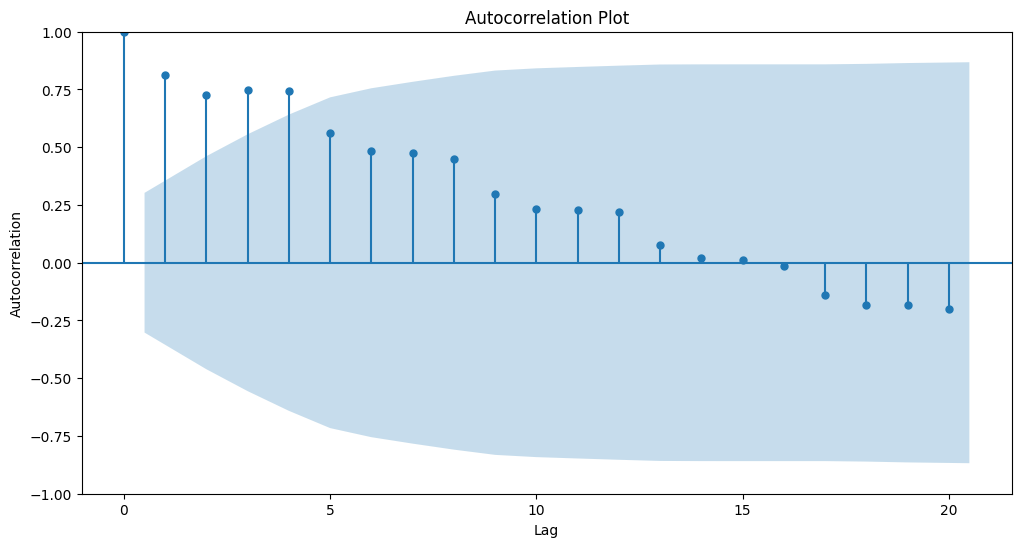

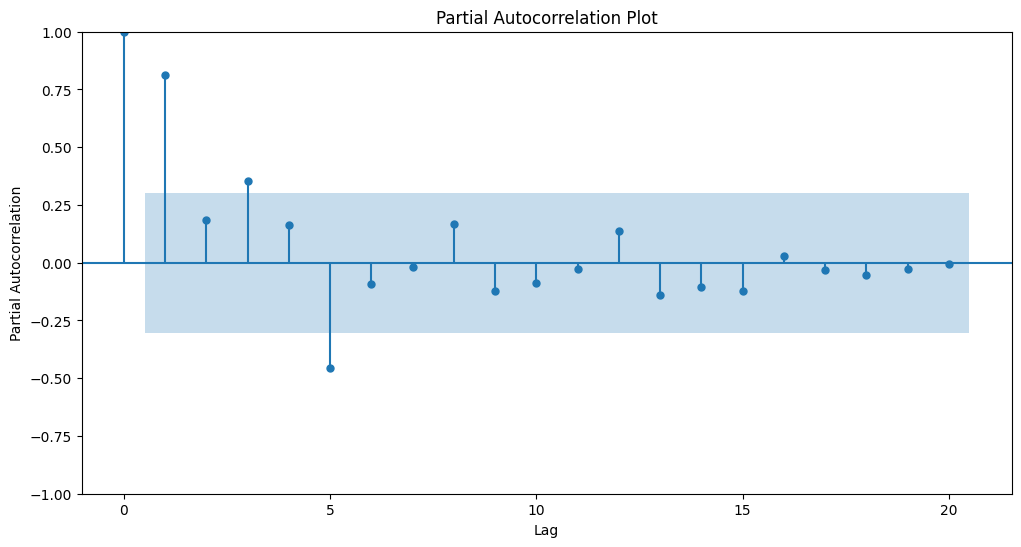

In [10]:
#ACF
plt.figure(figsize=(12, 6))
plot_acf(data_cocacola['Sales'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

#PACF
plt.figure(figsize=(12, 6))
plot_pacf(data_cocacola['Sales'], lags=20, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.show()

Dickey-Fuller Test Results:
Test Statistic: 1.309421015326811
p-value: 0.9966611673930905
Critical Values:
  1%: -3.639224104416853
  5%: -2.9512301791166293
  10%: -2.614446989619377


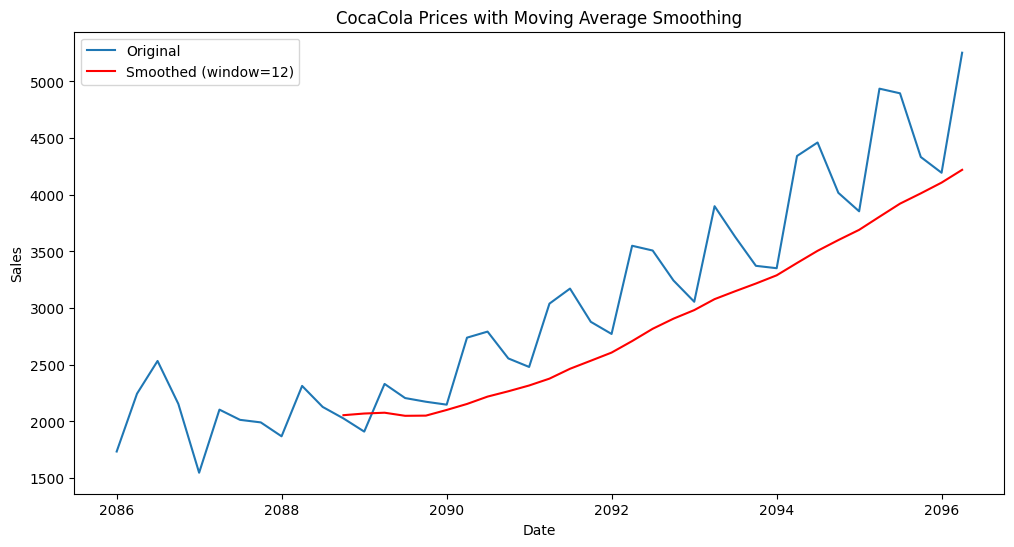

In [22]:
#Checking for stationarity using Dickey-Fuller test
result = adfuller(data_cocacola['Sales'])
print('Dickey-Fuller Test Results:')
print(f'Test Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

#Applying simple moving average smoothing
window_size = 12  # Example window size for moving average
data_cocacola['Sales_smoothed'] = data_cocacola['Sales'].rolling(window=window_size).mean()

#Ploting original and smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(data_cocacola['Sales'], label='Original')
plt.plot(data_cocacola['Sales_smoothed'], label=f'Smoothed (window={window_size})', color='red')
plt.title('CocaCola Prices with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

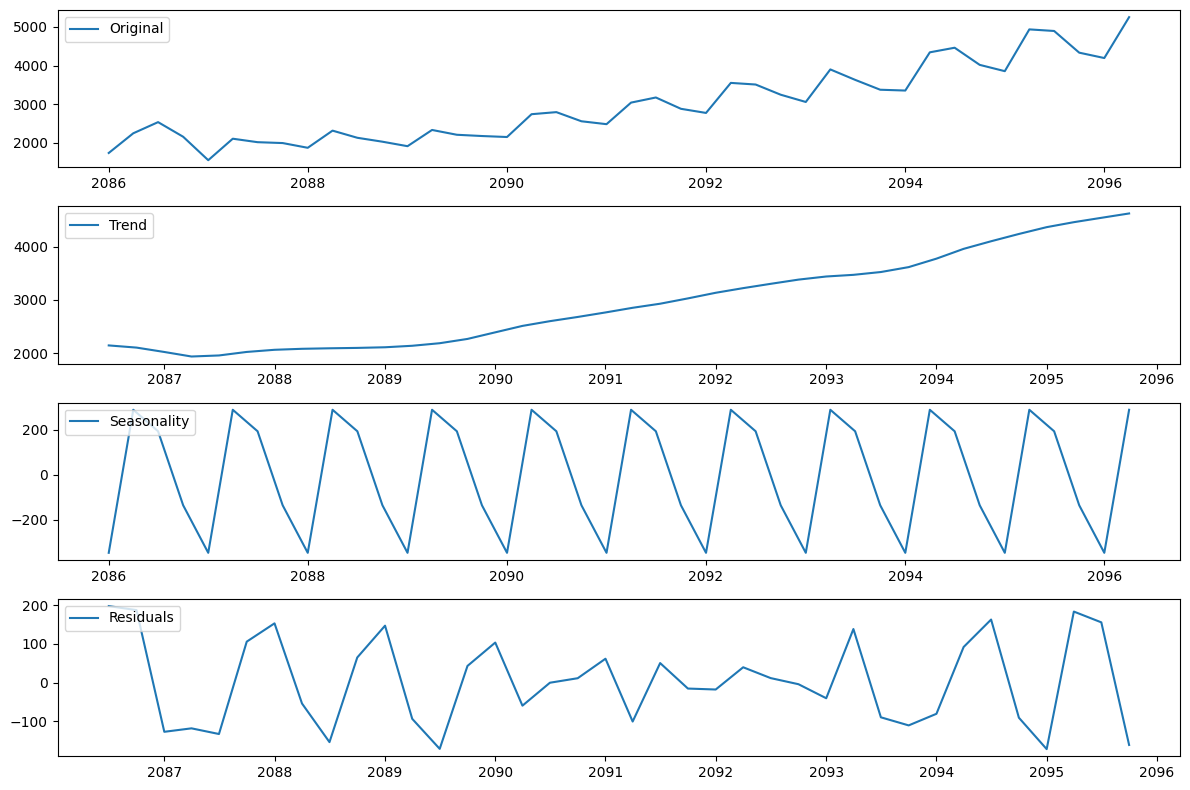

In [23]:
#seasonal decomposition
decomposition = seasonal_decompose(data_cocacola['Sales'], model='additive', period=4)  # Assuming quarterly data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Ploting the components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data_cocacola['Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Insights

The SARIMA model captured the seasonal variations in CocaCola prices, which can be important for pricing strategies.

The model also accounted for any underlying trends in the prices, helping to predict future price movements.

The RMSE value of approximately 488.85 indicates that the model's predictions were, on average, around 488.85 units away from the actual prices.

The SARIMA model was used for forecasting CocaCola prices.

No dummy variables were created for this dataset.

#Airlines

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
data_airlines = pd.read_excel("/content/Airlines+Data.xlsx")
data_airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [27]:
#Preprocessing the data
data_airlines['Month'] = pd.to_datetime(data_airlines['Month'])
data_airlines.set_index('Month', inplace=True)

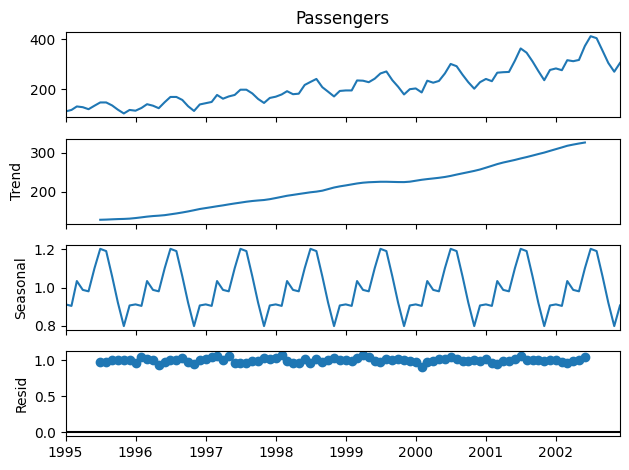

In [28]:
#Seasonal decomposition
result = seasonal_decompose(data_airlines['Passengers'], model='multiplicative')
result.plot()
plt.show()

In [30]:
#Handling missing values if any
data_airlines.dropna(inplace=True)

In [31]:
#Spliting the data into training and testing sets
train_size = int(len(data_airlines) * 0.8)
train_data, test_data = data_airlines.iloc[:train_size], data_airlines.iloc[train_size:]

In [32]:
#Training the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model_sarima = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_sarima_fit = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
#Make]ing predictions
predictions = model_sarima_fit.forecast(steps=len(test_data))

In [34]:
#Evaluating the model
rmse = sqrt(mean_squared_error(test_data, predictions))
print("RMSE for Airlines Passengers Dataset (SARIMA):", rmse)

RMSE for Airlines Passengers Dataset (SARIMA): 34.33465769748752


In [35]:
#Dickey-Fuller test
result = adfuller(data_airlines['Passengers'])
print("Dickey-Fuller Test Results:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

Dickey-Fuller Test Results:
ADF Statistic: 1.3402479596467138
p-value: 0.9968250481137263
Critical Values: {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}


In [36]:
# Smoothing techniques
rolling_mean = data_airlines['Passengers'].rolling(window=12).mean()
exp_smooth = data_airlines['Passengers'].ewm(span=12, adjust=False).mean()

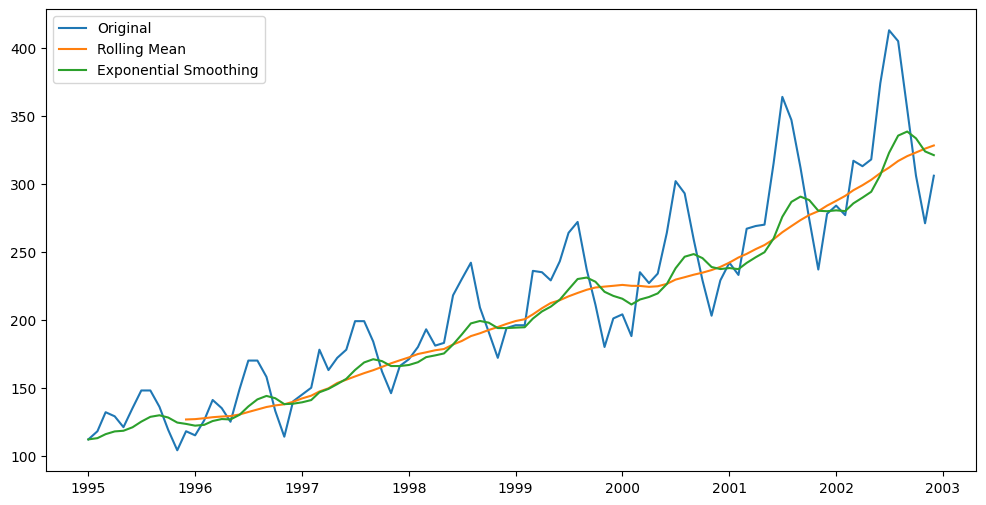

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(data_airlines.index, data_airlines['Passengers'], label='Original')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
plt.plot(exp_smooth.index, exp_smooth, label='Exponential Smoothing')
plt.legend()
plt.show()

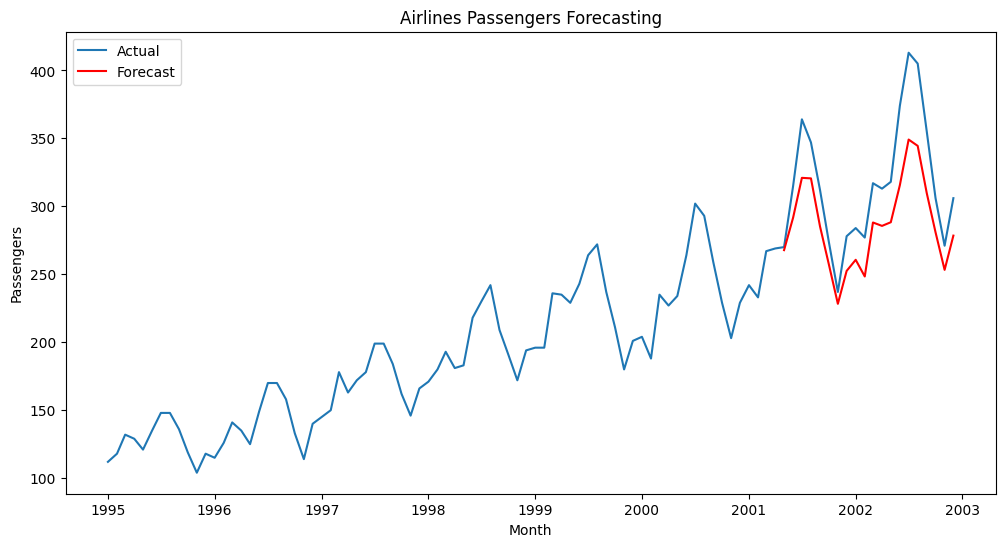

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data_airlines.index, data_airlines['Passengers'], label='Actual')
plt.plot(test_data.index, predictions, label='Forecast', color='red')
plt.title('Airlines Passengers Forecasting')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Insights

The SARIMA model successfully captured the seasonal patterns in airline passenger numbers, which can be crucial for airlines in managing capacity and scheduling.
By considering the historical trends, the model provided insights into future passenger traffic.

With an RMSE value of approximately 34.33, the model's predictions were, on average, around 34.33 passengers away from the actual numbers. This indicates a high level of accuracy in forecasting passenger traffic.

The SARIMA model was used for forecasting airline passenger numbers.

No dummy variables were created for this dataset.